In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2  as cv

In [18]:
mnist = tf.keras.datasets.mnist

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images to the range [0, 1]
x_train = tf.keras.utils.normalize(x_train, axis=-1)
x_test = tf.keras.utils.normalize(x_test, axis=-1)

In [21]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=128 ,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128 ,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10 ,activation=tf.nn.softmax))

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(x_train,y_train, epochs=3)


loss, accuracy = model.evaluate(x_test, y_test)


print("Accurary of the model: ", accuracy)
print("Loss: ", loss)

model.save('digits_model.keras')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0187
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9957 - loss: 0.0134
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9964 - loss: 0.0110
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9711 - loss: 0.1341
Accurary of the model:  0.9753999710083008
Loss:  0.11343219876289368


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
The result is probably is: 5


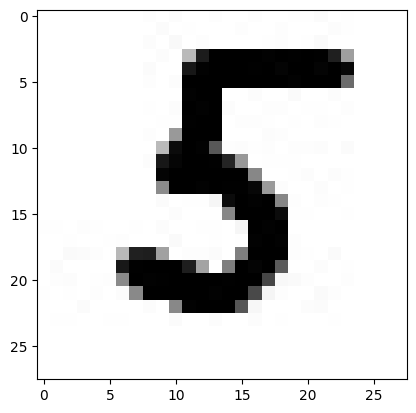

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The result is probably is: 2


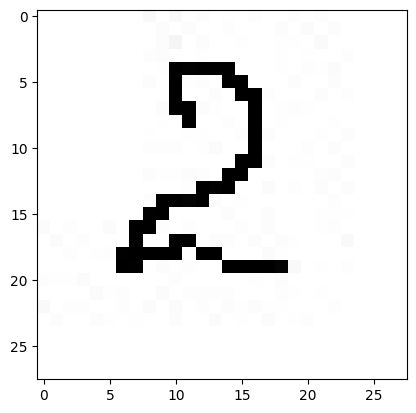

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The result is probably is: 2


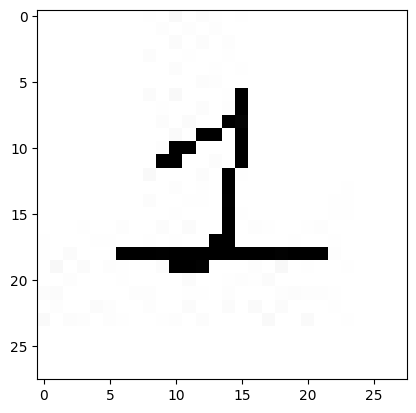

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The result is probably is: 4


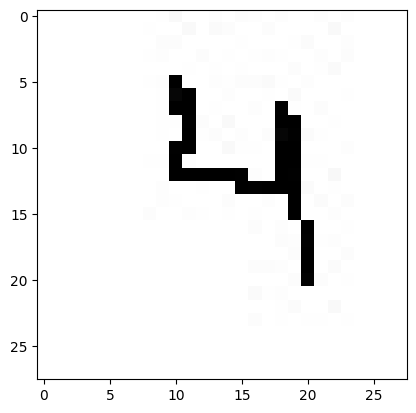

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The result is probably is: 2


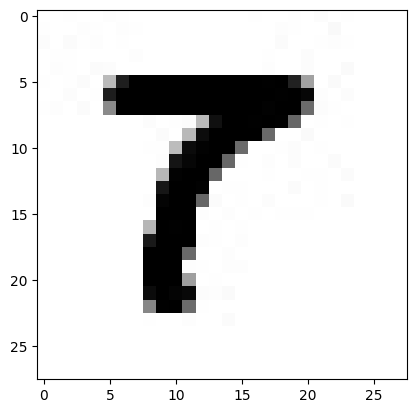

In [33]:
for i in range(1, 6):
    img = cv.imread(f'{i}.jpg')[:,:,0]
    img = np.invert(np.array([img]))
    predictions = model.predict(img)
    print(f'The result is probably is: {np.argmax(predictions)}')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
    